### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [151]:
# Data Loading
import pandas as pd
import numpy as np
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
print(wine.isnull().sum())
wine.head(1)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [152]:
print("Wine Data Shape :", wine.shape)
# Drop rows with missing values
wine = wine.dropna()

# Dropping Duplicates rows
wine.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping-) :", wine.shape)


Wine Data Shape : (6497, 13)
Wine Data Shape (After Dropping-) : (5295, 13)


In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [154]:
trainx,testx,trainy,testy=train_test_split(wine.drop('type',axis=1),wine['type'],test_size=0.2,random_state=42)

In [155]:
trainy.shape,testy.shape,trainx.shape,testx.shape

((4236,), (1059,), (4236, 12), (1059, 12))

In [156]:
scale=StandardScaler()
trainx_s=scale.fit_transform(trainx)
testx_s=scale.transform(testx)
knn=KNeighborsClassifier()
knn.fit(trainx_s,trainy)

KNeighborsClassifier()

In [163]:
from sklearn.metrics import accuracy_score
accuracy_score(testy,y_pred)

0.9933899905571294

In [168]:
for i in range(1,11):
  pca=PCA(n_components=i)
  trainx_pca=pca.fit_transform(trainx_s)
  testx_pca=pca.transform(testx_s)
  knn.fit(trainx_pca,trainy)
  y_pred=knn.predict(testx_pca)
  print(i,accuracy_score(testy,y_pred))

1 0.9754485363550519
2 0.9763928234183191
3 0.9754485363550519
4 0.9858356940509915
5 0.9886685552407932
6 0.9886685552407932
7 0.9905571293673276
8 0.9933899905571294
9 0.9924457034938622
10 0.9924457034938622


In [170]:
pca=PCA(n_components=None)
pca.fit(trainx_s)

PCA()

In [171]:
pca.explained_variance_ratio_

array([0.25338398, 0.22064311, 0.13758045, 0.08945723, 0.07060832,
       0.05464252, 0.0451817 , 0.04242425, 0.03938657, 0.02514279,
       0.01862054, 0.00292855])

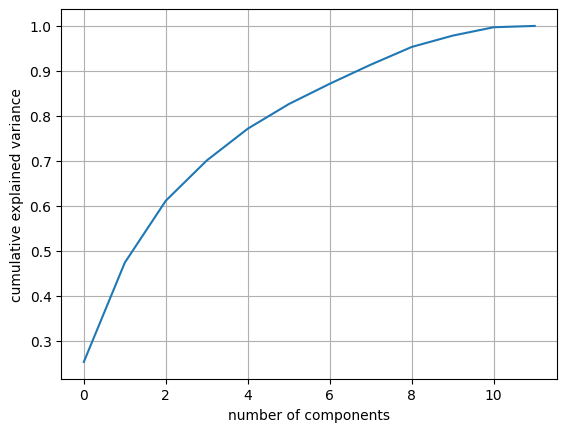

In [172]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_), )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()